In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_MBS.csv') 

In [5]:
df.head()

,Date,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.350365,0.717929,0.725832,0.630776,0.712547,0.745522,0.677576,0.708116,0.592760,0.694897,0.492488,0.570117,0.253638,0.747463,0.551875,4.0
1,1997-02-28 00:00:00,0.313869,0.637829,0.558983,0.601489,0.639215,0.562434,0.410301,0.594846,0.455540,0.589623,0.389947,0.540783,0.202642,0.541103,0.473883,4.0
2,1997-03-31 00:00:00,0.372263,0.375000,0.589971,0.562439,0.615111,0.556375,0.547829,0.525178,0.408284,0.592410,0.436515,0.586204,0.353999,0.529601,0.467643,4.0
3,1997-04-30 00:00:00,0.335766,0.661608,0.586265,0.667873,0.547397,0.599052,0.451645,0.602666,0.365778,0.632933,0.420977,0.645439,0.352820,0.409844,0.422184,4.0
4,1997-05-31 00:00:00,0.328467,0.562735,0.513109,0.470997,0.240147,0.496839,0.336672,0.507642,0.286514,0.609563,0.413176,0.607589,0.350575,0.398342,0.441813,4.0


In [6]:
df = df.drop(columns=[#"Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.501295,0.493999,0.497352,0.489545,0.495918,0.503700,0.504949,0.512186,0.511790,0.495789,0.445458,0.497647,0.458988,2.55914
std,0.201425,0.207990,0.210104,0.218887,0.209323,0.219842,0.208194,0.221212,0.200958,0.224305,0.213694,0.242868,0.201318,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.343066,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.292076,0.375000,0.326409,2.00000
50%,0.467153,0.511023,0.511976,0.501054,0.512001,0.509064,0.532947,0.510077,0.536752,0.502933,0.461649,0.466678,0.450613,3.00000
75%,0.605839,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.575246,0.625000,0.595845,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               234 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 75th percentile (top 25%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 75th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.75) # every data point over the 75th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.6040145985


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.747618,0.479049,0.529232,0.504554,0.550619,0.491156,0.570696,0.507072,0.591016,0.526237,0.484175,0.583539,0.431933,2.677966
std,0.099597,0.266575,0.200418,0.251137,0.221568,0.229170,0.205943,0.251059,0.233415,0.215156,0.235384,0.211724,0.189848,1.089775
min,0.605839,0.000000,0.013125,0.000000,0.000000,0.000000,0.105918,0.000000,0.000000,0.000000,0.000000,0.013701,0.000000,1.000000
25%,0.649635,0.317076,0.414572,0.331138,0.455691,0.374941,0.469252,0.355596,0.475688,0.410579,0.331186,0.431326,0.298411,2.000000
50%,0.744526,0.508095,0.556464,0.535037,0.530049,0.480391,0.562285,0.528302,0.604230,0.532646,0.462929,0.543809,0.390085,3.000000
75%,0.806569,0.659738,0.657013,0.676106,0.674471,0.638448,0.674094,0.682033,0.686710,0.634936,0.639872,0.718369,0.588263,4.000000
max,0.978102,1.000000,0.971814,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998482,1.000000,0.924476,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 3-mo (Treasury)   59.0  0.479049  0.266575  0.034705   
 2                         combined  118.0  0.613334  0.241519  0.022234   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.409579  0.548519  
 2   0.569301  0.657366  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2686
 1                              Degrees of freedom =   116.0000
 2                                               t =     7.2492
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3347
 7                                       Hedge's g =     1.3260
 8           

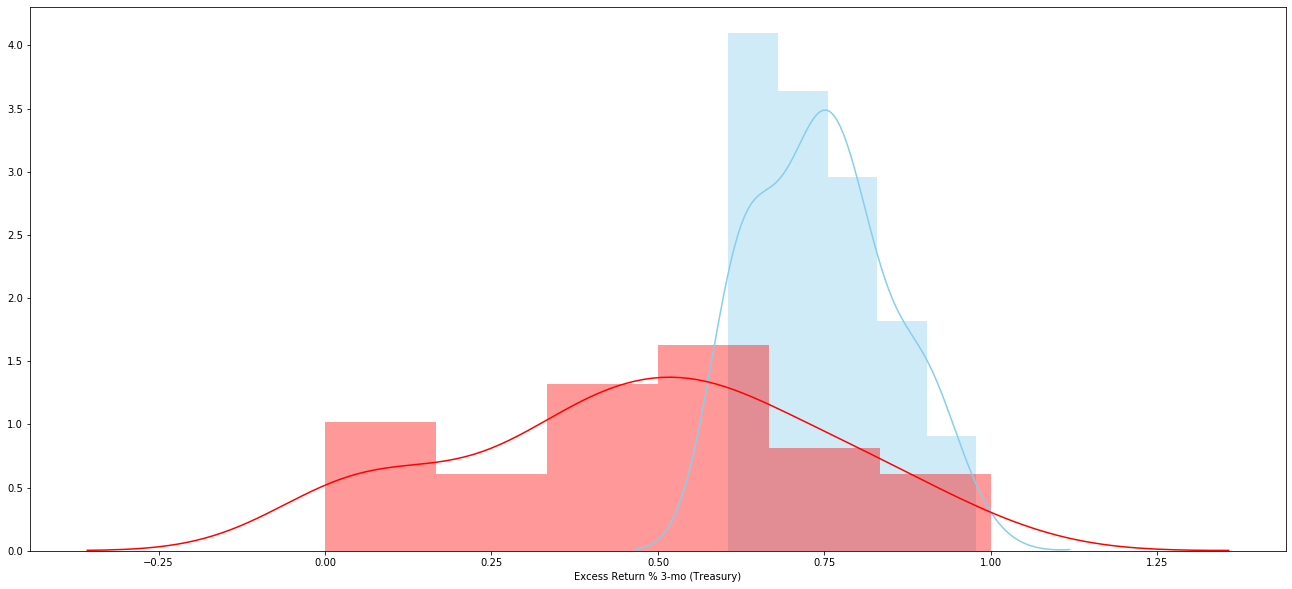

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.747618  0.099597  0.012966   0.721663   
 1  Excess Return % 3-mo (Agg)   59.0  0.529232  0.200418  0.026092   0.477003   
 2                    combined  118.0  0.638425  0.191975  0.017673   0.603425   
 
    Interval  
 0  0.773574  
 1  0.581462  
 2  0.673425  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2184
 1                             Degrees of freedom =   116.0000
 2                                              t =     7.4953
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.3800
 7                                      Hedge's g =     1.3711
 8                                  Glass'

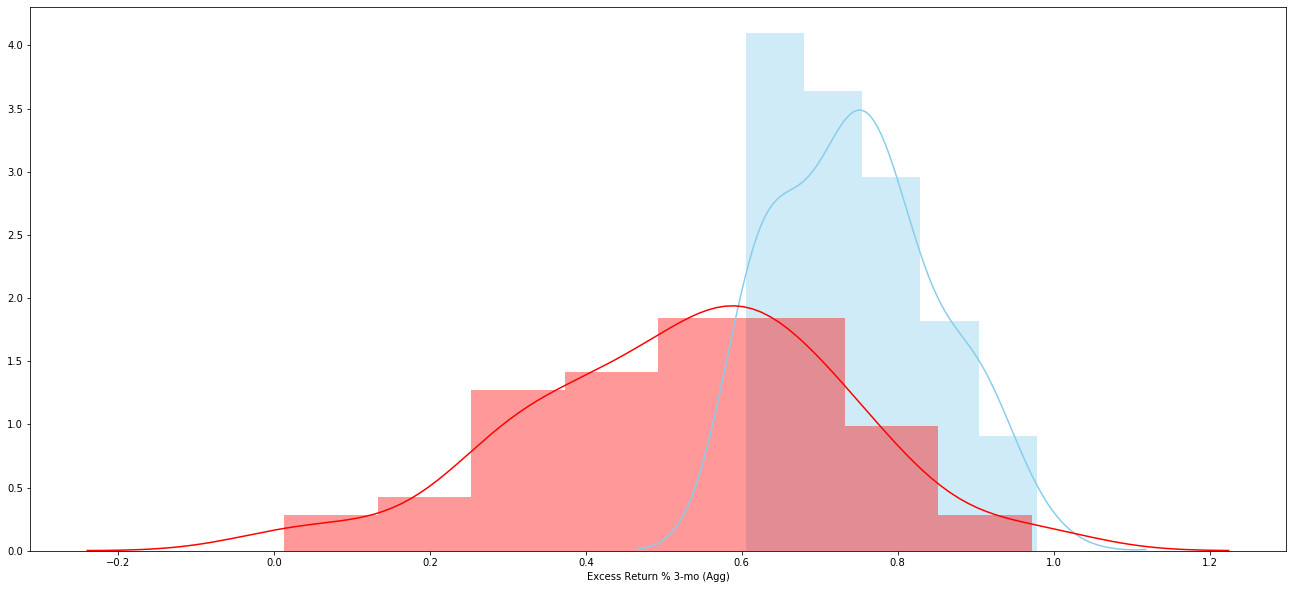

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 6-mo (Treasury)   59.0  0.504554  0.251137  0.032695   
 2                         combined  118.0  0.626086  0.226007  0.020806   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.439108  0.570001  
 2   0.584882  0.667291  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2431
 1                              Degrees of freedom =   116.0000
 2                                               t =     6.9106
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2723
 7                                       Hedge's g =     1.2641
 8           

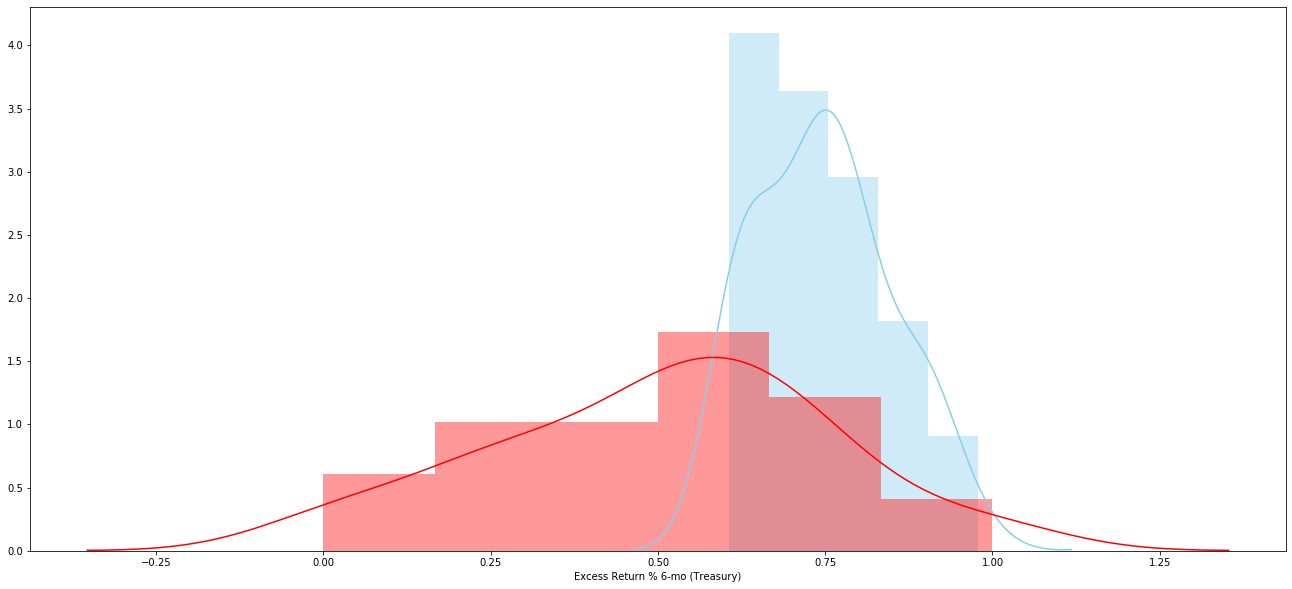

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.747618  0.099597  0.012966   0.721663   
 1  Excess Return % 6-mo (Agg)   59.0  0.550619  0.221568  0.028846   0.492878   
 2                    combined  118.0  0.649119  0.197583  0.018189   0.613096   
 
    Interval  
 0  0.773574  
 1  0.608360  
 2  0.685141  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.1970
 1                             Degrees of freedom =   116.0000
 2                                              t =     6.2291
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1469
 7                                      Hedge's g =     1.1394
 8                                  Glass'

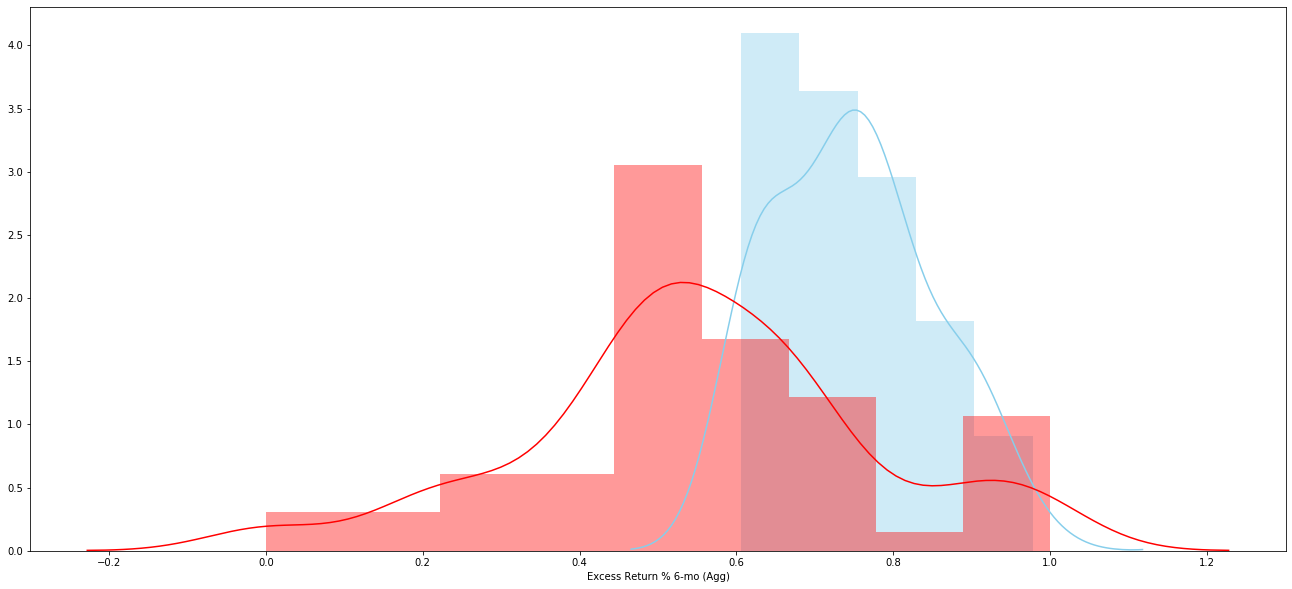

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 9-mo (Treasury)   59.0  0.491156  0.229170  0.029835   
 2                         combined  118.0  0.619387  0.218028  0.020071   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.431434  0.550878  
 2   0.579637  0.659137  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2565
 1                              Degrees of freedom =   116.0000
 2                                               t =     7.8836
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4515
 7                                       Hedge's g =     1.4421
 8           

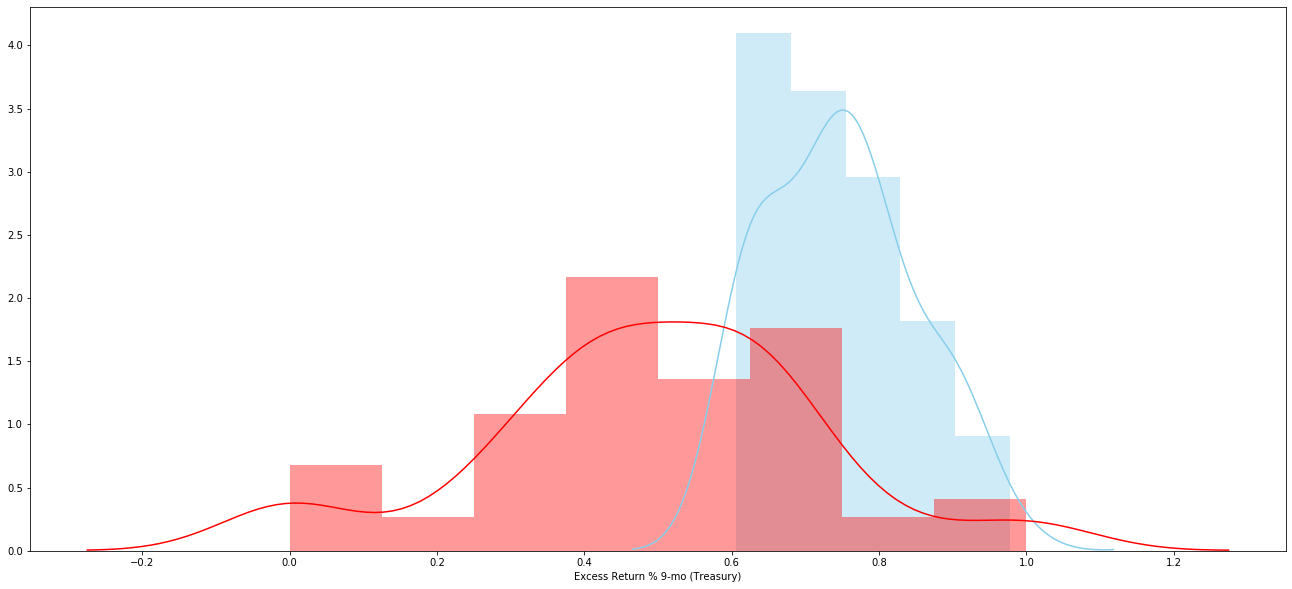

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.747618  0.099597  0.012966   0.721663   
 1  Excess Return % 9-mo (Agg)   59.0  0.570696  0.205943  0.026811   0.517027   
 2                    combined  118.0  0.659157  0.183942  0.016933   0.625622   
 
    Interval  
 0  0.773574  
 1  0.624365  
 2  0.692693  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.1769
 1                             Degrees of freedom =   116.0000
 2                                              t =     5.9405
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.0937
 7                                      Hedge's g =     1.0867
 8                                  Glass'

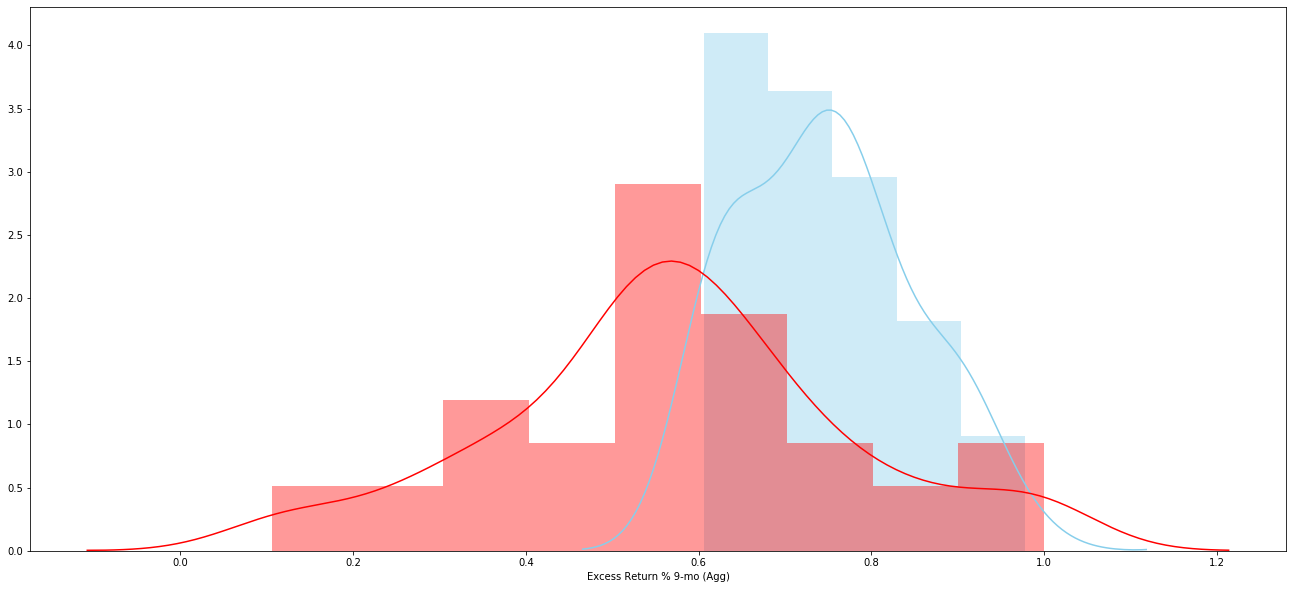

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 12-mo (Treasury)   59.0  0.507072  0.251059  0.032685   
 2                          combined  118.0  0.627345  0.225283  0.020739   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.441645  0.572498  
 2   0.586273  0.668418  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2405
 1                              Degrees of freedom =   116.0000
 2                                               t =     6.8409
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2595
 7                                       Hedge's g =     1.2513
 8       

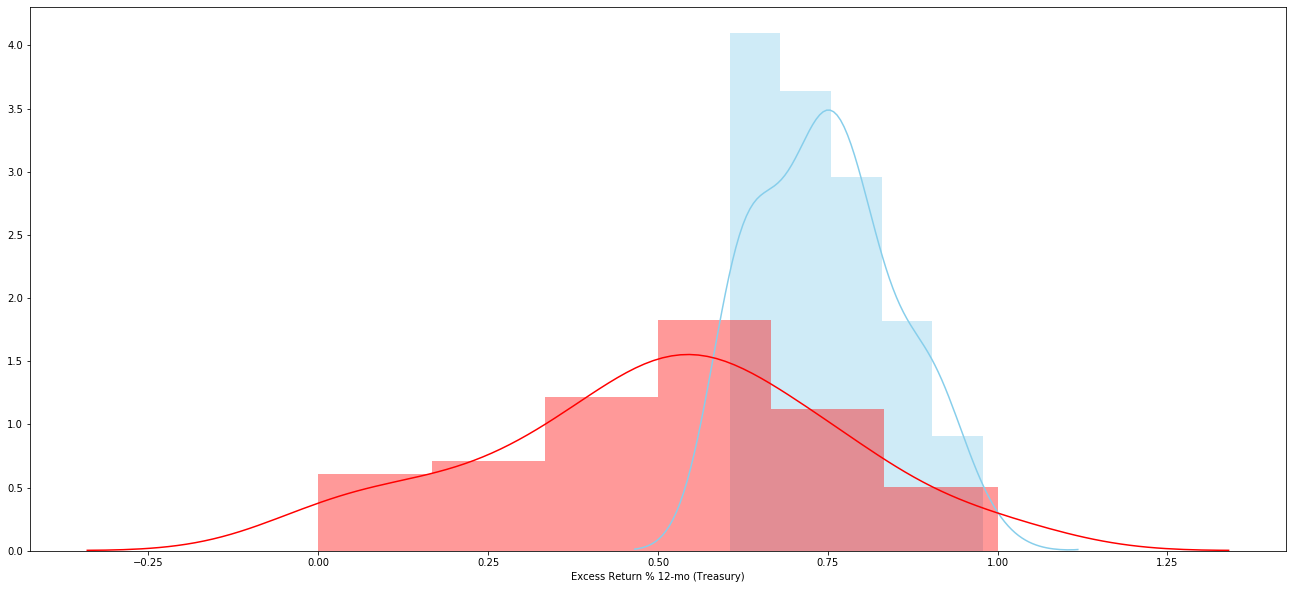

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 12-mo (Agg)   59.0  0.591016  0.233415  0.030388   
 2                     combined  118.0  0.669317  0.195216  0.017971   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.530188  0.651845  
 2   0.633727  0.704908  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.1566
 1                              Degrees of freedom =   116.0000
 2                                               t =     4.7400
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.8727
 7                                       Hedge's g =     0.8670
 8                           

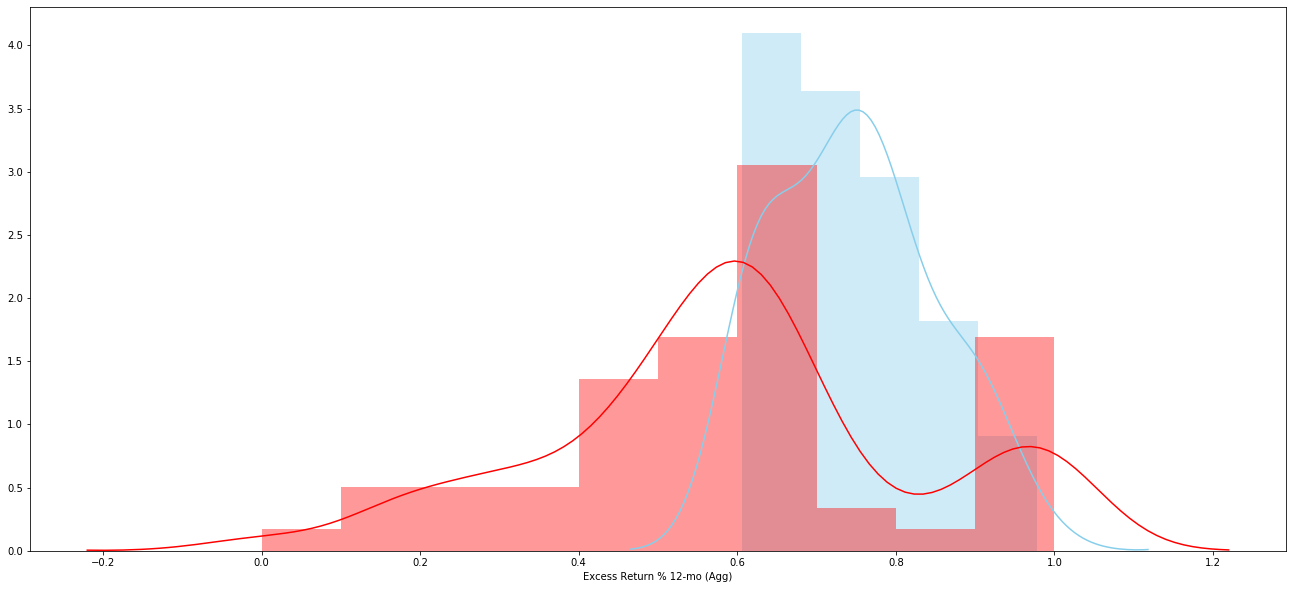

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 24-mo (Treasury)   59.0  0.526237  0.215156  0.028011   
 2                          combined  118.0  0.636928  0.200556  0.018463   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.470167  0.582307  
 2   0.600363  0.673492  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2214
 1                              Degrees of freedom =   116.0000
 2                                               t =     7.1722
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3205
 7                                       Hedge's g =     1.3120
 8       

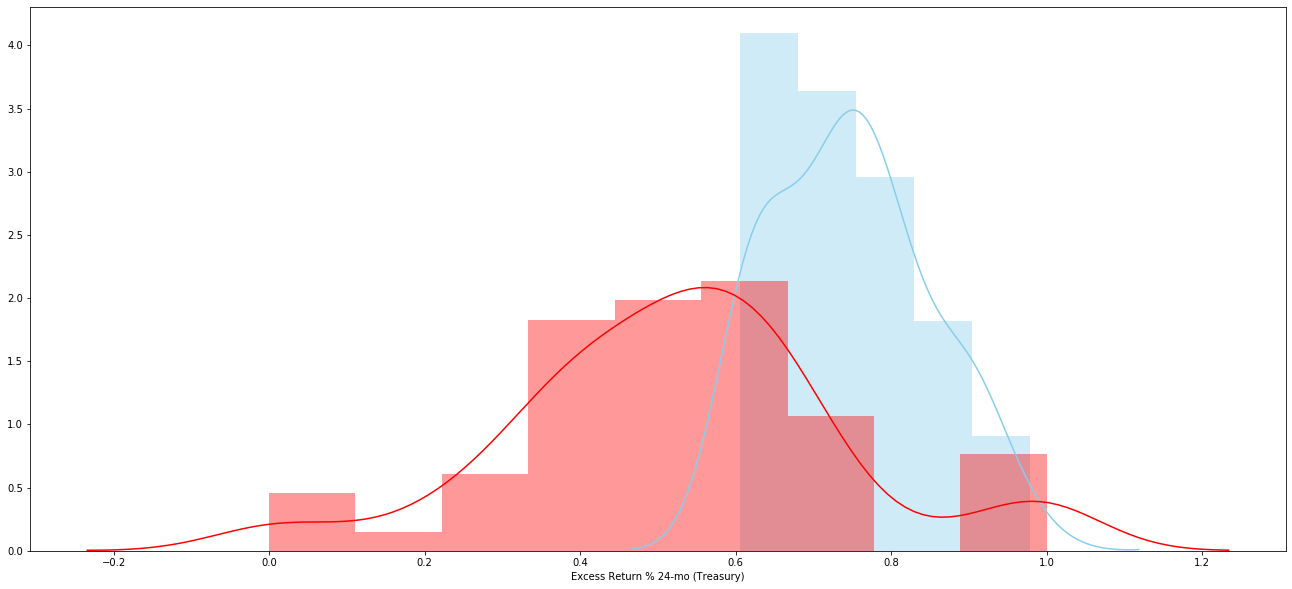

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 24-mo (Agg)   59.0  0.484175  0.235384  0.030644   
 2                     combined  118.0  0.615897  0.223343  0.020560   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.422834  0.545517  
 2   0.575178  0.656616  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2634
 1                              Degrees of freedom =   116.0000
 2                                               t =     7.9172
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4577
 7                                       Hedge's g =     1.4482
 8                           

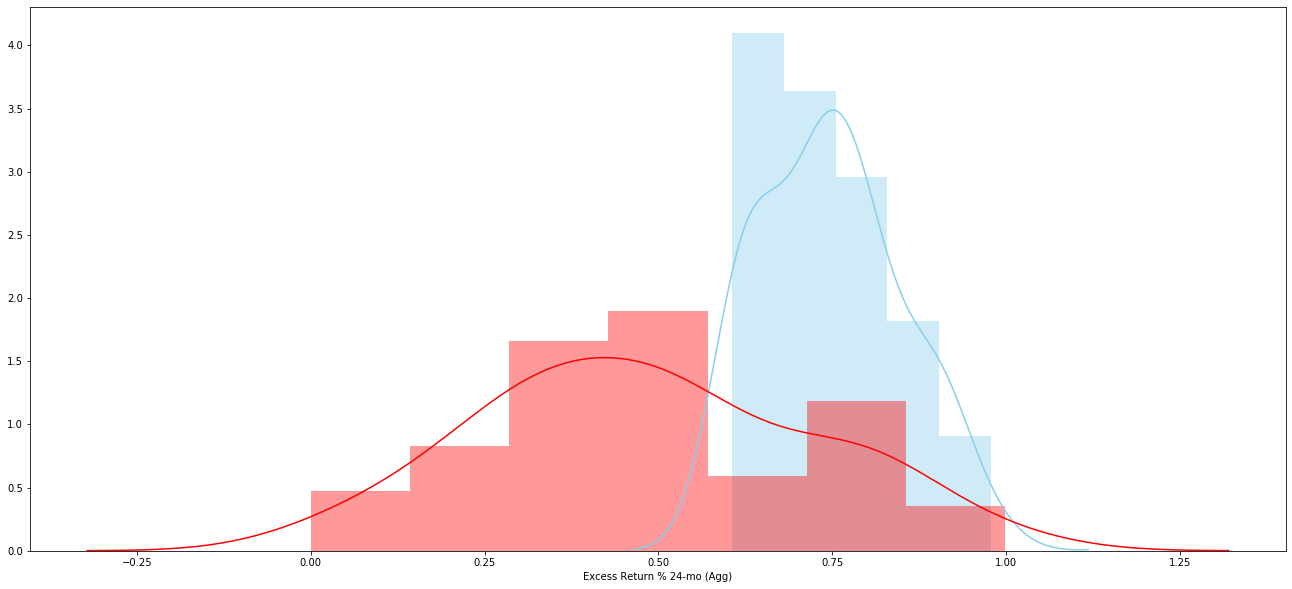

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 36-mo (Treasury)   59.0  0.583539  0.211724  0.027564   
 2                          combined  118.0  0.665579  0.184194  0.016956   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.528363  0.638714  
 2   0.631997  0.699160  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.1641
 1                              Degrees of freedom =   116.0000
 2                                               t =     5.3864
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     0.9917
 7                                       Hedge's g =     0.9853
 8       

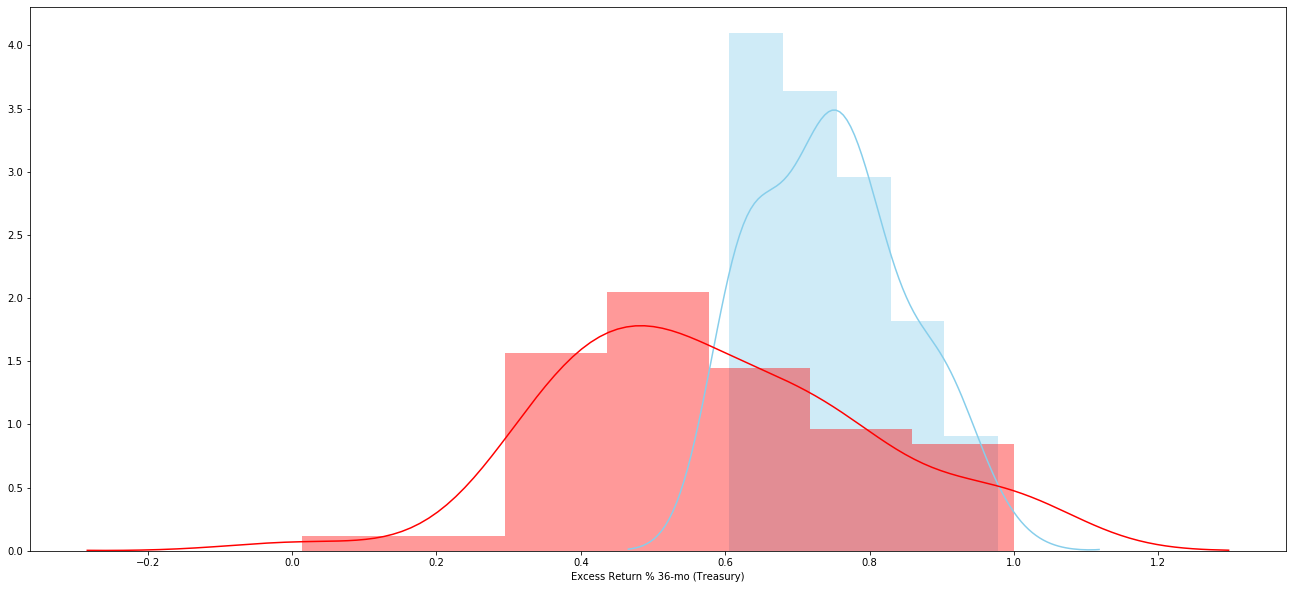

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 36-mo (Agg)   59.0  0.431933  0.189848  0.024716   
 2                     combined  118.0  0.589776  0.218888  0.020150   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.382458  0.481407  
 2   0.549869  0.629682  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3157
 1                              Degrees of freedom =   116.0000
 2                                               t =    11.3105
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     2.0824
 7                                       Hedge's g =     2.0689
 8                           

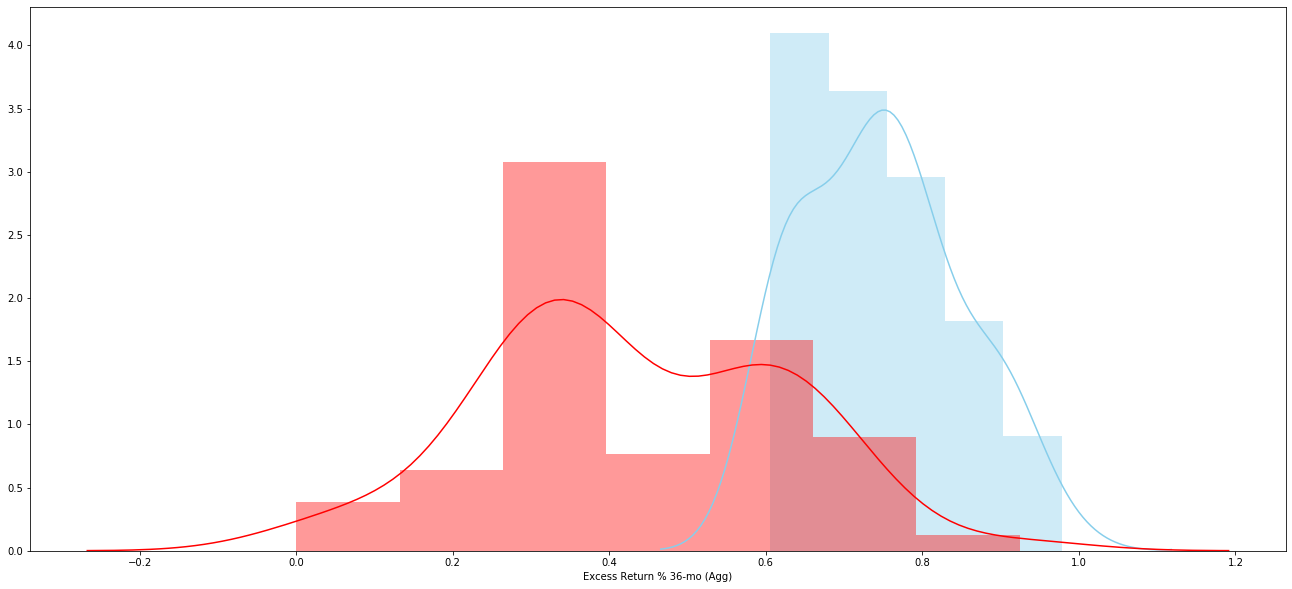

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_MBS.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,278.000000,278.000000,278.000000,275.000000,275.000000,272.000000,272.000000,269.000000,269.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.501295,0.491995,0.494670,0.493999,0.497352,0.489545,0.495918,0.503700,0.504949,0.512186,0.511790,0.495789,0.445458,0.497647,0.458988,2.55914
std,0.201425,0.212702,0.222768,0.207990,0.210104,0.218887,0.209323,0.219842,0.208194,0.221212,0.200958,0.224305,0.213694,0.242868,0.201318,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.343066,0.375000,0.374848,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.292076,0.375000,0.326409,2.00000
50%,0.467153,0.513924,0.509160,0.511023,0.511976,0.501054,0.512001,0.509064,0.532947,0.510077,0.536752,0.502933,0.461649,0.466678,0.450613,3.00000
75%,0.605839,0.625000,0.620595,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.575246,0.625000,0.595845,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 3-mo (Treasury)  278.0  0.493999  0.207990  0.012474   
 2                         combined  337.0  0.538401  0.216086  0.011771   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.469442  0.518556  
 2   0.515247  0.561555  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2536
 1                              Degrees of freedom =   335.0000
 2                                               t =     9.1385
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.3099
 7                                       Hedge's g =     1.3070
 8           

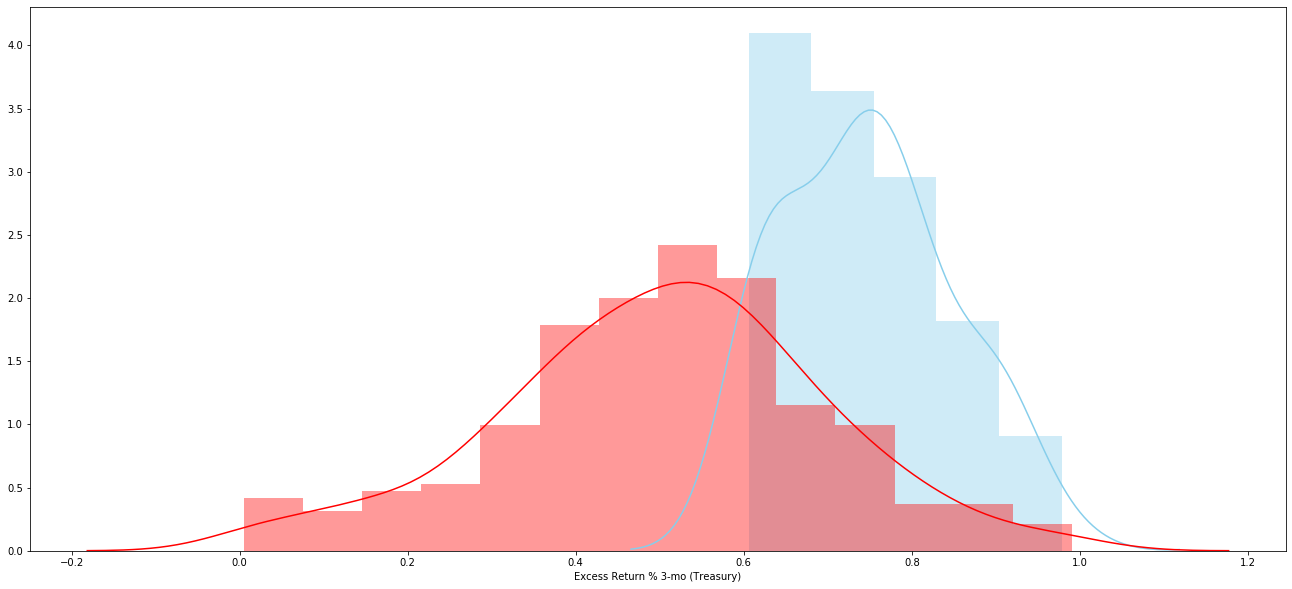

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.747618  0.099597  0.012966   0.721663   
 1  Excess Return % 3-mo (Agg)  278.0  0.497352  0.210104  0.012601   0.472546   
 2                    combined  337.0  0.541168  0.217203  0.011832   0.517894   
 
    Interval  
 0  0.773574  
 1  0.522159  
 2  0.564441  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2503
 1                             Degrees of freedom =   335.0000
 2                                              t =     8.9310
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2802
 7                                      Hedge's g =     1.2773
 8                                  Glass'

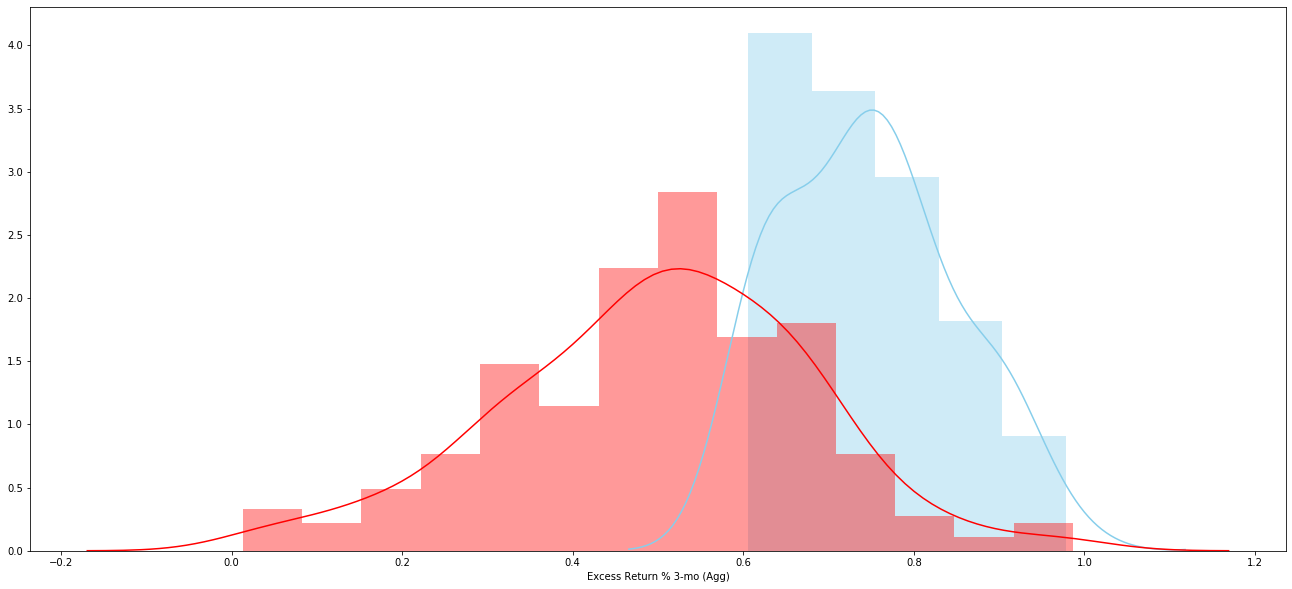

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 6-mo (Treasury)  275.0  0.489545  0.218887  0.013199   
 2                         combined  334.0  0.535133  0.225536  0.012341   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.463560  0.515530  
 2   0.510857  0.559408  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2581
 1                              Degrees of freedom =   332.0000
 2                                               t =     8.8536
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2703
 7                                       Hedge's g =     1.2674
 8           

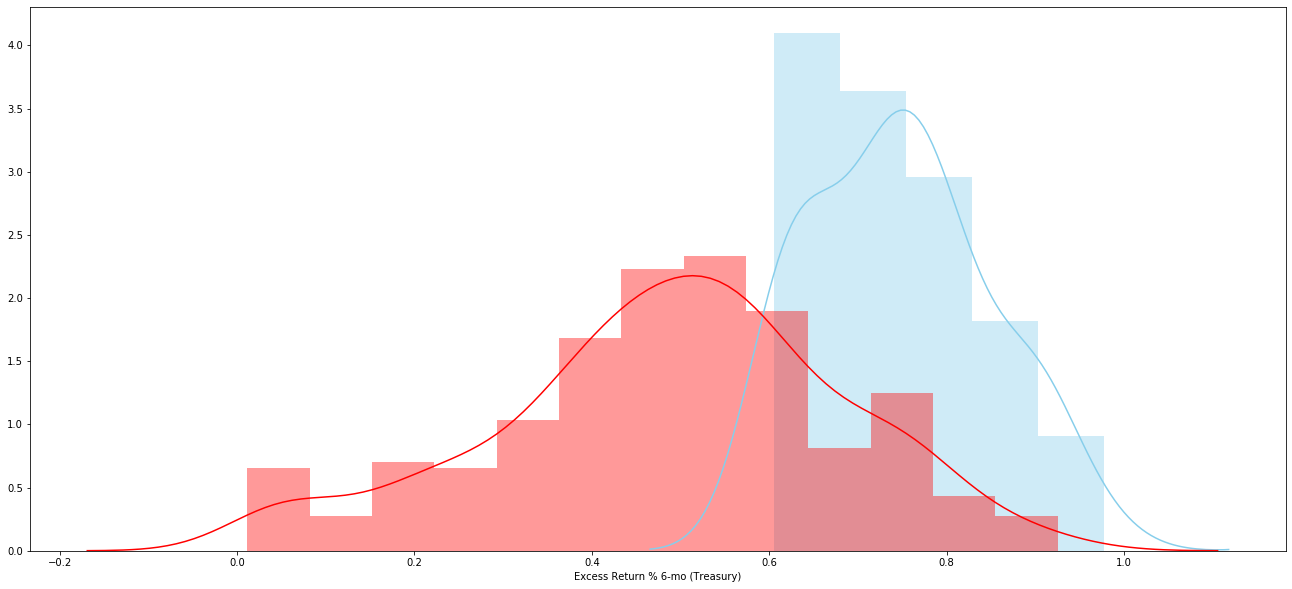

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.747618  0.099597  0.012966   0.721663   
 1  Excess Return % 6-mo (Agg)  275.0  0.495918  0.209323  0.012623   0.471068   
 2                    combined  334.0  0.540380  0.216847  0.011865   0.517040   
 
    Interval  
 0  0.773574  
 1  0.520768  
 2  0.563721  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2517
 1                             Degrees of freedom =   332.0000
 2                                              t =     9.0119
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2930
 7                                      Hedge's g =     1.2901
 8                                  Glass'

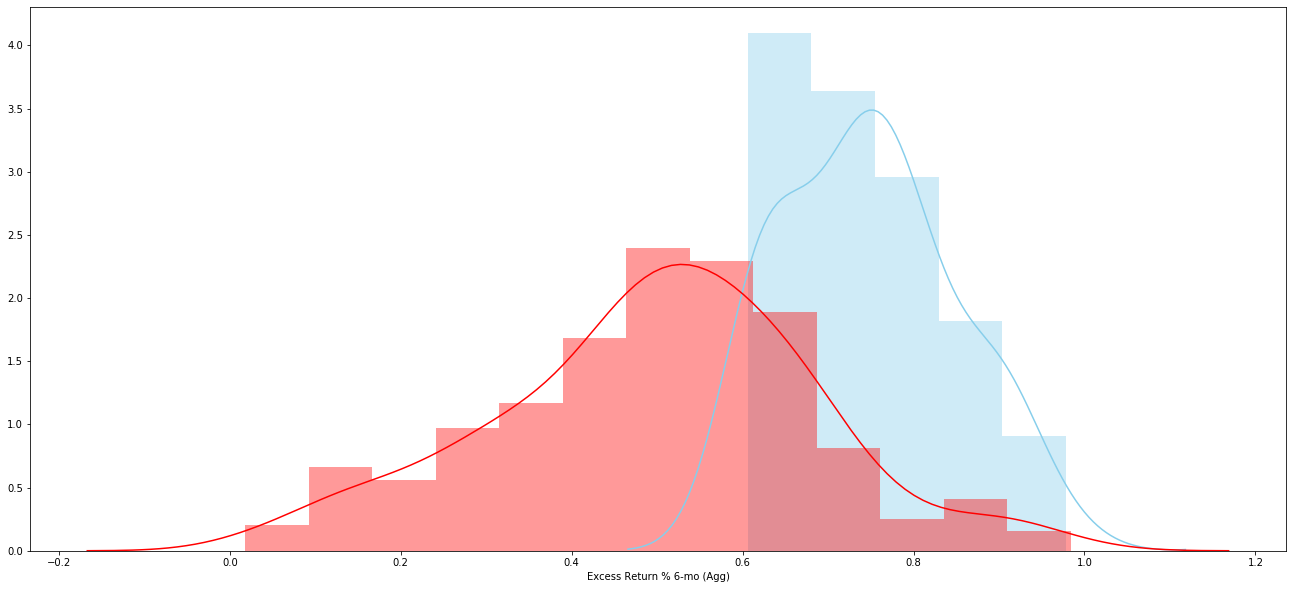

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 9-mo (Treasury)  272.0  0.503700  0.219842  0.013330   
 2                         combined  331.0  0.547178  0.223996  0.012312   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.477457  0.529943  
 2   0.522958  0.571398  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2439
 1                              Degrees of freedom =   329.0000
 2                                               t =     8.3312
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1965
 7                                       Hedge's g =     1.1938
 8           

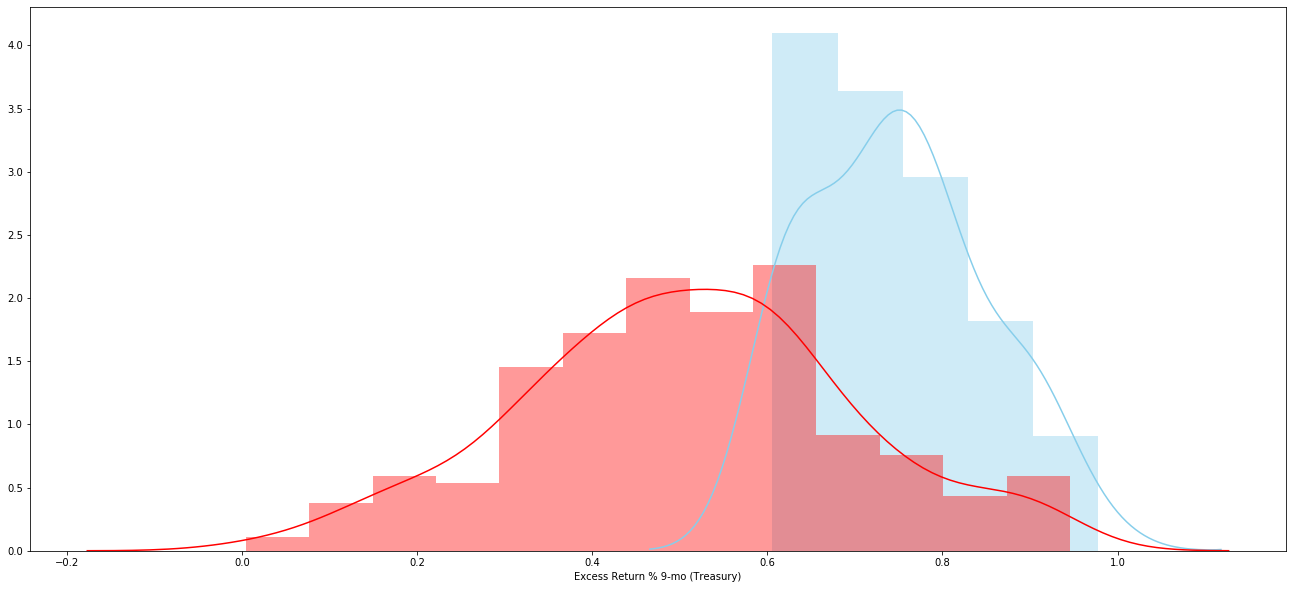

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   59.0  0.747618  0.099597  0.012966   0.721663   
 1  Excess Return % 9-mo (Agg)  272.0  0.504949  0.208194  0.012624   0.480096   
 2                    combined  331.0  0.548204  0.214454  0.011787   0.525016   
 
    Interval  
 0  0.773574  
 1  0.529802  
 2  0.571392  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2427
 1                             Degrees of freedom =   329.0000
 2                                              t =     8.7312
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.2539
 7                                      Hedge's g =     1.2511
 8                                  Glass'

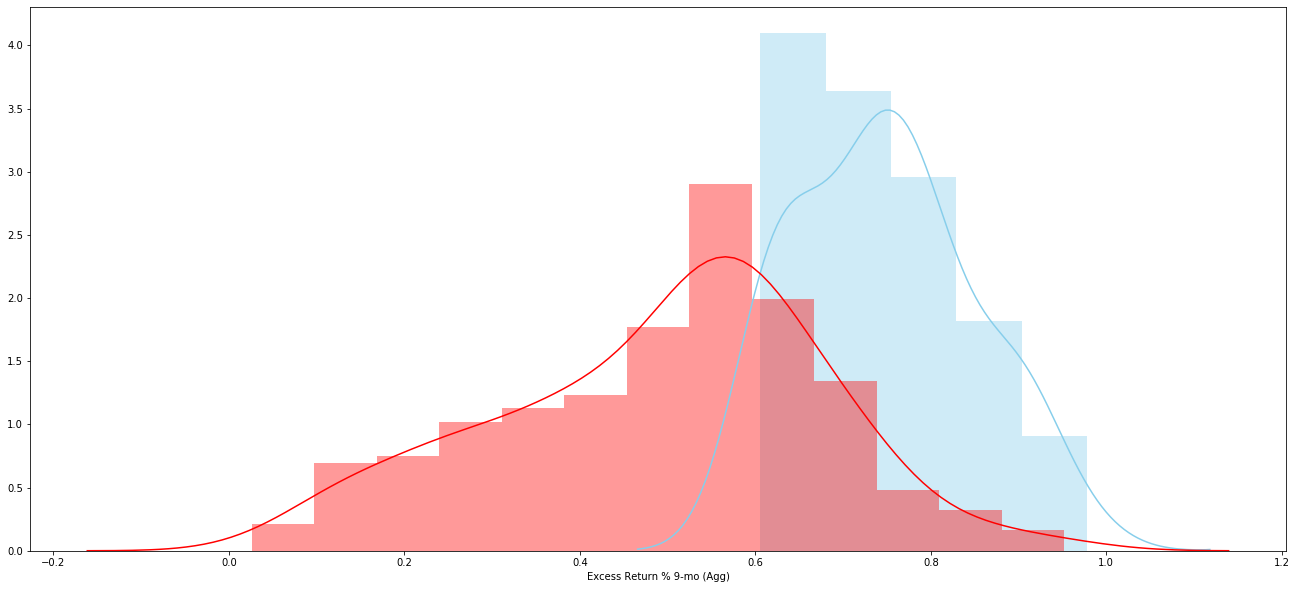

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 12-mo (Treasury)  269.0  0.512186  0.221212  0.013488   
 2                          combined  328.0  0.554535  0.223756  0.012355   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.485631  0.538741  
 2   0.530230  0.578840  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2354
 1                              Degrees of freedom =   326.0000
 2                                               t =     7.9917
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1489
 7                                       Hedge's g =     1.1462
 8       

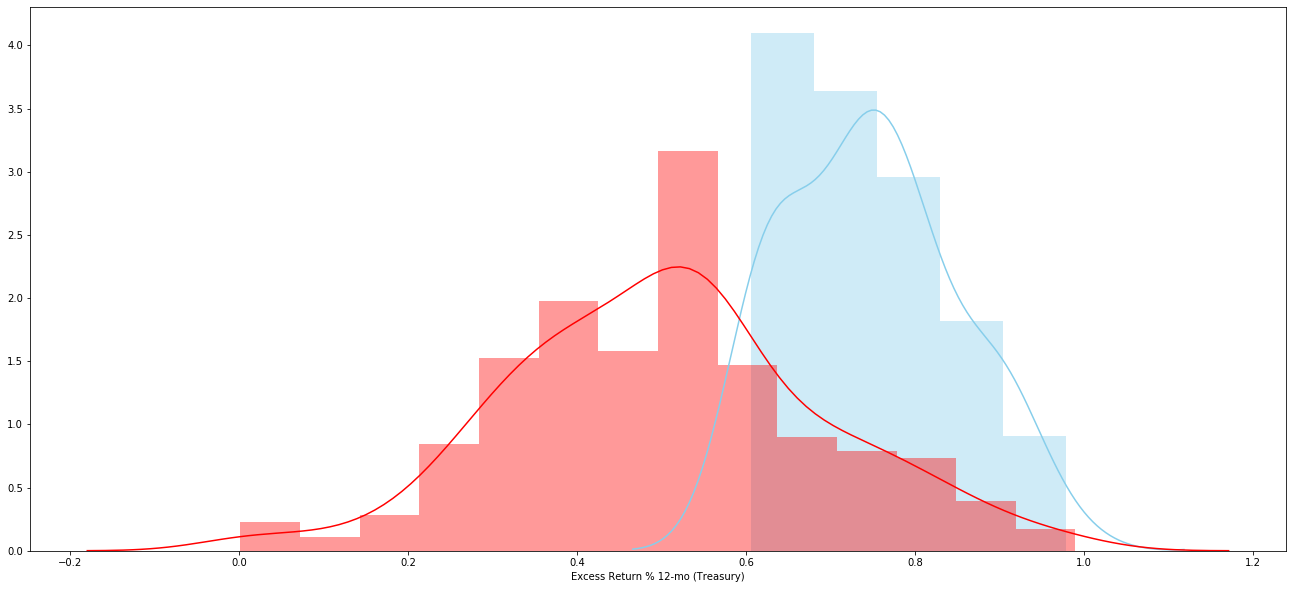

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 12-mo (Agg)  269.0  0.511790  0.200958  0.012253   
 2                     combined  328.0  0.554210  0.207574  0.011461   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.487666  0.535914  
 2   0.531663  0.576758  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2358
 1                              Degrees of freedom =   326.0000
 2                                               t =     8.7730
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2612
 7                                       Hedge's g =     1.2583
 8                           

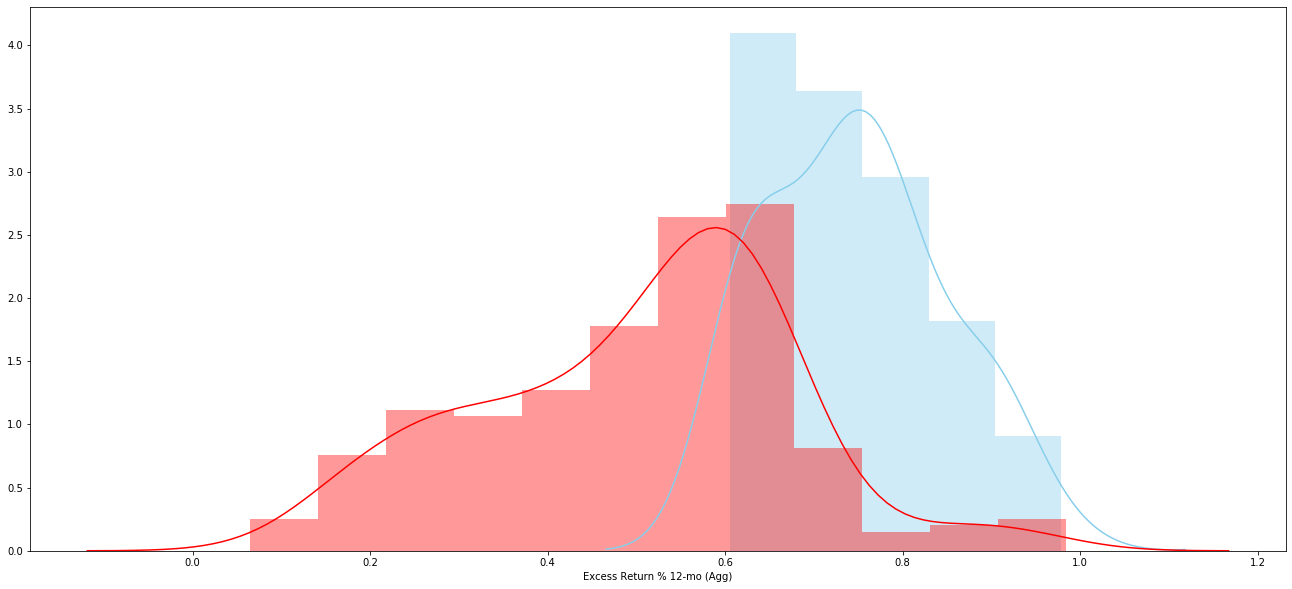

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 24-mo (Treasury)  257.0  0.495789  0.224305  0.013992   
 2                          combined  316.0  0.542807  0.228858  0.012874   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.468235  0.523342  
 2   0.517477  0.568138  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2518
 1                              Degrees of freedom =   314.0000
 2                                               t =     8.4270
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2165
 7                                       Hedge's g =     1.2136
 8       

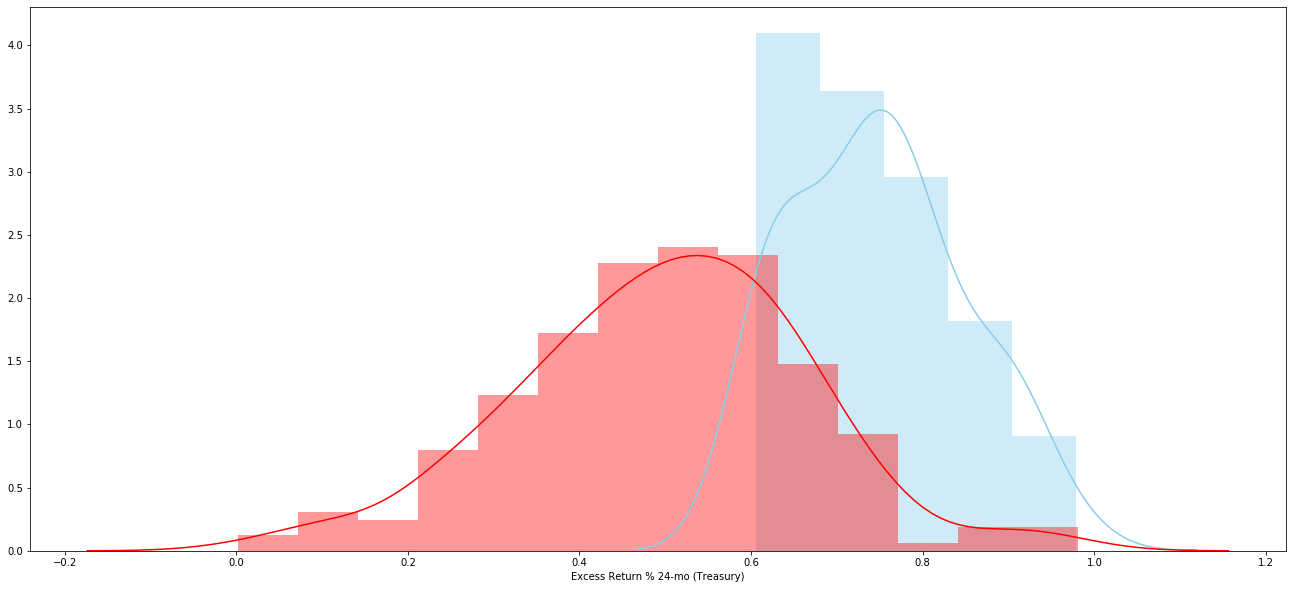

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 24-mo (Agg)  257.0  0.445458  0.213694  0.013330   
 2                     combined  316.0  0.501874  0.229883  0.012932   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.419208  0.471708  
 2   0.476430  0.527318  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3022
 1                              Degrees of freedom =   314.0000
 2                                               t =    10.5903
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5288
 7                                       Hedge's g =     1.5252
 8                           

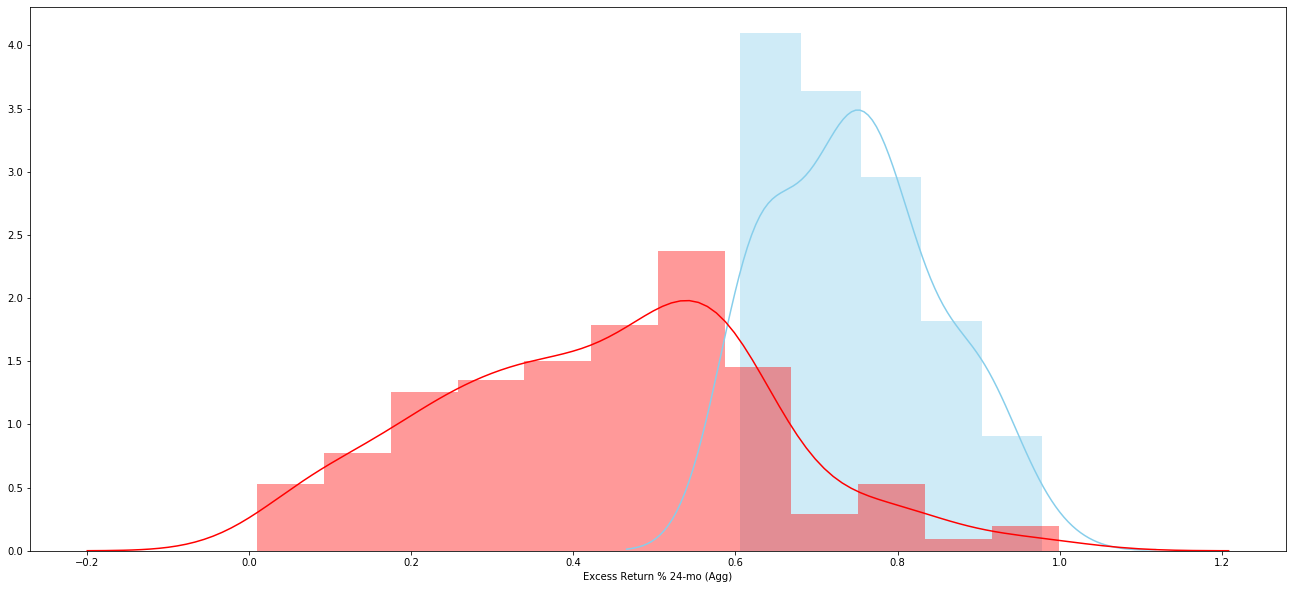

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 36-mo (Treasury)  245.0  0.497647  0.242868  0.015516   
 2                          combined  304.0  0.546161  0.243319  0.013955   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.467084  0.528210  
 2   0.518700  0.573623  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2500
 1                              Degrees of freedom =   302.0000
 2                                               t =     7.7426
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1228
 7                                       Hedge's g =     1.1200
 8       

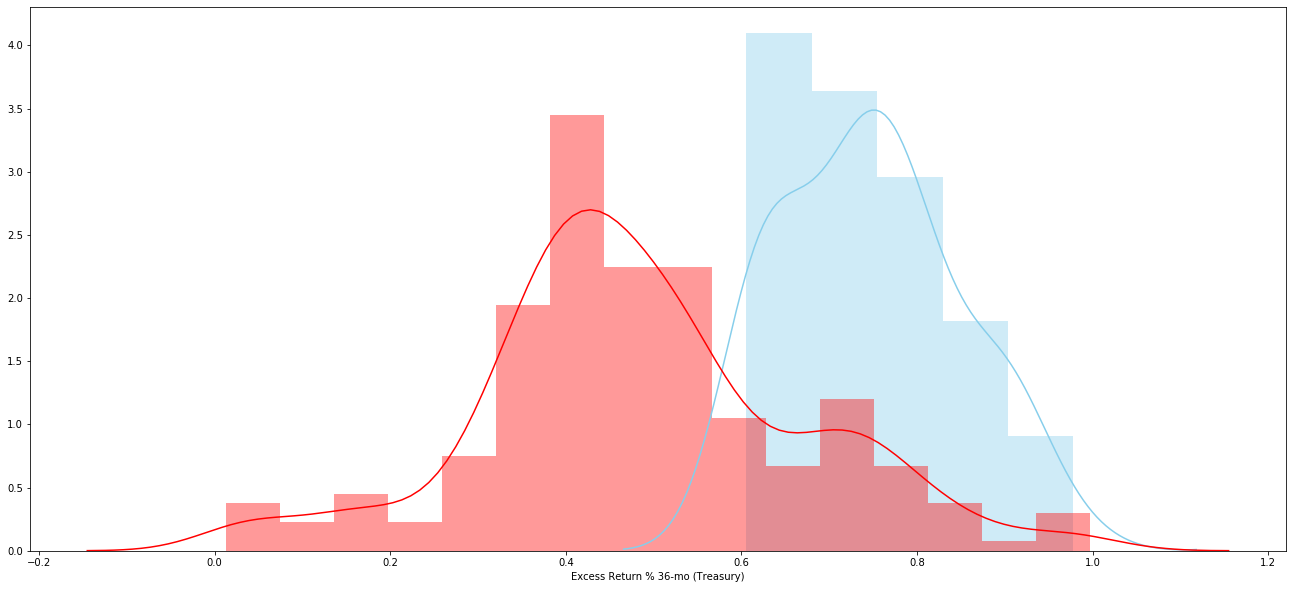

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   59.0  0.747618  0.099597  0.012966   
 1  Excess Return % 36-mo (Agg)  245.0  0.458988  0.201318  0.012862   
 2                     combined  304.0  0.515005  0.218195  0.012514   
 
    95% Conf.  Interval  
 0   0.721663  0.773574  
 1   0.433654  0.484323  
 2   0.490379  0.539632  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2886
 1                              Degrees of freedom =   302.0000
 2                                               t =    10.6920
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5506
 7                                       Hedge's g =     1.5467
 8                           

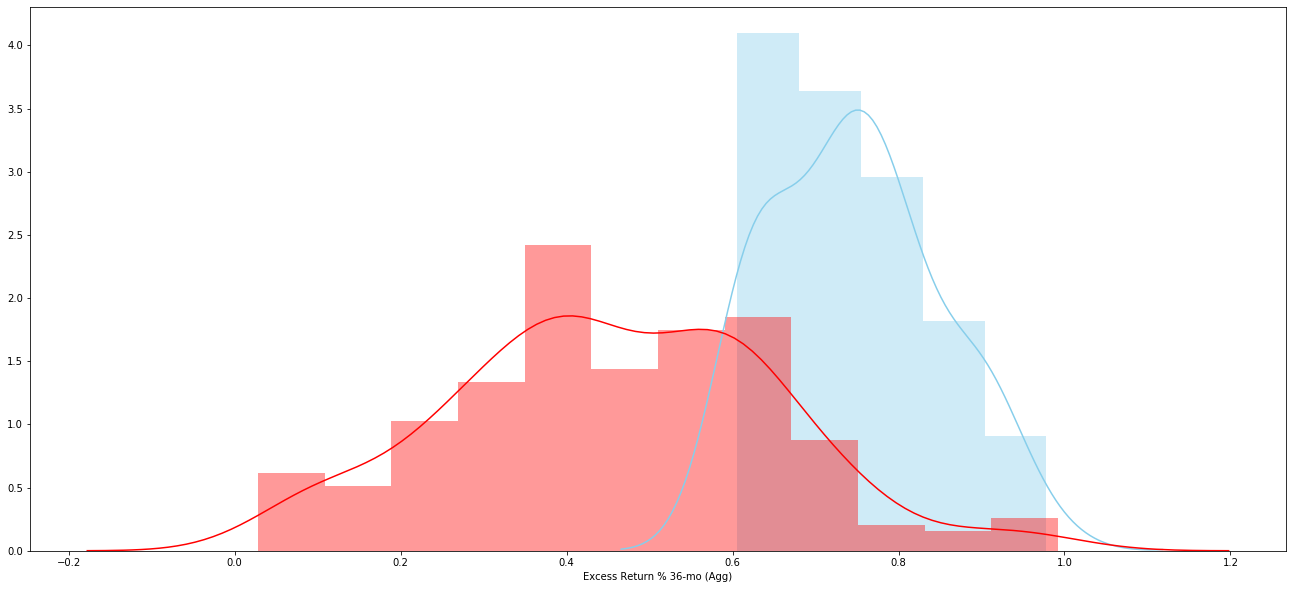

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")